In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

### Importing the data

In [3]:
data = pd.read_csv("/kaggle/input/titanic/train.csv")

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Cleaning the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data = data.fillna(data.mean())

In [9]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [10]:
data = data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

In [11]:
data = data[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Survived"]]

In [12]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.000000,1,0,7.2500,S,0
1,1,female,38.000000,1,0,71.2833,C,1
2,3,female,26.000000,0,0,7.9250,S,1
3,1,female,35.000000,1,0,53.1000,S,1
4,3,male,35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S,0
887,1,female,19.000000,0,0,30.0000,S,1
888,3,female,29.699118,1,2,23.4500,S,0
889,1,male,26.000000,0,0,30.0000,C,1


### Data Mining

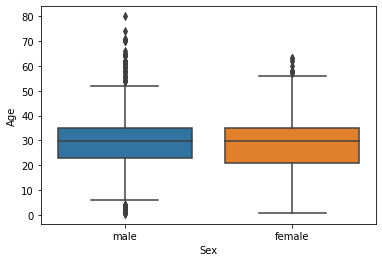

In [13]:
import seaborn as sns
sns.boxplot(data["Sex"],data["Age"])

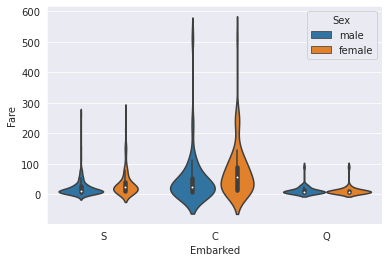

In [14]:
sns.set_style("darkgrid")
sns.violinplot(data["Embarked"], data["Fare"], hue=data["Sex"])

In [15]:
data.corr()

,Pclass,Age,SibSp,Parch,Fare,Survived
Pclass,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.338481
Age,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.069809
SibSp,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.035322
Parch,0.018443,-0.179191,0.414838,1.000000,0.216225,0.081629
Fare,-0.549500,0.091566,0.159651,0.216225,1.000000,0.257307
Survived,-0.338481,-0.069809,-0.035322,0.081629,0.257307,1.000000


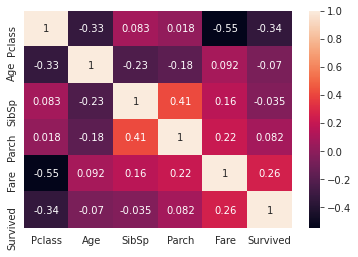

In [16]:
import seaborn as sns
sns.set_style("darkgrid")

sns.heatmap(data.corr(), annot=True)

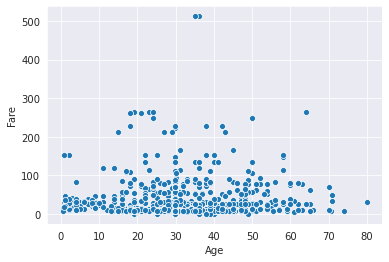

In [17]:
sns.scatterplot(data["Age"], data["Fare"])

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [19]:
data["Embarked"] = encoder.fit_transform(data["Embarked"].astype(np.str))

In [20]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.000000,1,0,7.2500,2,0
1,1,female,38.000000,1,0,71.2833,0,1
2,3,female,26.000000,0,0,7.9250,2,1
3,1,female,35.000000,1,0,53.1000,2,1
4,3,male,35.000000,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,2,0
887,1,female,19.000000,0,0,30.0000,2,1
888,3,female,29.699118,1,2,23.4500,2,0
889,1,male,26.000000,0,0,30.0000,0,1


In [21]:
data.groupby("Embarked").size()

Embarked
0    168
1     77
2    644
3      2
dtype: int64

In [22]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.000000,1,0,7.2500,2,0
1,1,female,38.000000,1,0,71.2833,0,1
2,3,female,26.000000,0,0,7.9250,2,1
3,1,female,35.000000,1,0,53.1000,2,1
4,3,male,35.000000,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,2,0
887,1,female,19.000000,0,0,30.0000,2,1
888,3,female,29.699118,1,2,23.4500,2,0
889,1,male,26.000000,0,0,30.0000,0,1


In [23]:
data["Sex"] = encoder.fit_transform(data["Sex"])

In [24]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.000000,1,0,7.2500,2,0
1,1,0,38.000000,1,0,71.2833,0,1
2,3,0,26.000000,0,0,7.9250,2,1
3,1,0,35.000000,1,0,53.1000,2,1
4,3,1,35.000000,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2,0
887,1,0,19.000000,0,0,30.0000,2,1
888,3,0,29.699118,1,2,23.4500,2,0
889,1,1,26.000000,0,0,30.0000,0,1


In [25]:
X = data.iloc[:,:-1].values
y = data.iloc[:, -1].values

In [26]:
X

array([[ 3.        ,  1.        , 22.        , ...,  0.        ,
         7.25      ,  2.        ],
       [ 1.        ,  0.        , 38.        , ...,  0.        ,
        71.2833    ,  0.        ],
       [ 3.        ,  0.        , 26.        , ...,  0.        ,
         7.925     ,  2.        ],
       ...,
       [ 3.        ,  0.        , 29.69911765, ...,  2.        ,
        23.45      ,  2.        ],
       [ 1.        ,  1.        , 26.        , ...,  0.        ,
        30.        ,  0.        ],
       [ 3.        ,  1.        , 32.        , ...,  0.        ,
         7.75      ,  1.        ]])

In [27]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

### Split into the training and test sets

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.shape

(712, 7)

In [30]:
X_test.shape

(179, 7)

### Normalization

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train

array([[-1.61413602,  0.7243102 ,  1.22920747, ..., -0.47934164,
        -0.07868358,  0.55744438],
       [-0.40055118,  0.7243102 , -0.50350514, ..., -0.47934164,
        -0.37714494,  0.55744438],
       [ 0.81303367,  0.7243102 ,  0.18957991, ..., -0.47934164,
        -0.47486697,  0.55744438],
       ...,
       [ 0.81303367,  0.7243102 ,  0.88266495, ..., -0.47934164,
        -0.35580399,  0.55744438],
       [-1.61413602, -1.38062393, -1.19659018, ...,  2.04874166,
         1.68320121,  0.55744438],
       [-1.61413602,  0.7243102 , -0.65752403, ...,  0.78470001,
         0.86074761,  0.55744438]])

## Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=40,criterion="entropy", random_state=42)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=42)

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

### Model Evaluation

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[91 14]
 [18 56]]


0.8212290502793296

In [37]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 78.23 %
Standard Deviation: 4.71 %


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## XGBOOST CLASSIFIER

In [39]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Model Evaluation

In [40]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[87 18]
 [19 55]]


0.7932960893854749

In [41]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.35 %
Standard Deviation: 3.83 %


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179

